<a href="https://colab.research.google.com/github/aashu-0/machine-learning/blob/main/classifcation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#fetching mnist dataset using fetch_openml

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version =1)
mnist.keys()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
# 70,000 images each of pixels 28*28 i.e 784 features
X, y = mnist['data'], mnist['target']
X.shape

(70000, 784)

In [3]:
y.shape

(70000,)

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

type(X)
a1 = np.array(X)
a2 = a1[0]
# reshaping instance's feature vector yo a 28*28 array
a2_image = a2.reshape(28, 28)


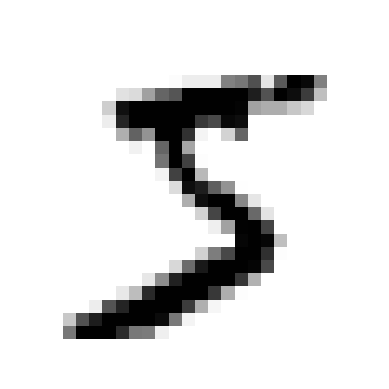

In [5]:
# displaying data as image
plt.imshow(a2_image, cmap = mpl.cm.binary)
plt.axis('off')
plt.show()

In [6]:
y[0]

'5'

In [7]:
# casting y to integers

y = y.astype(np.uint8)

In [8]:
# splitting train and test set

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [9]:
# training a binary classifier
# let's try to identify digit 5
# predict whether the number is 5 or not 5

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [10]:
# creating a sgd(Stochastic Gradient Descent) classifier and training it

In [11]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [12]:
# predicting a2

sgd_clf.predict([a2])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [13]:
# sgdg classifier predicted  it correctly
# Performance Measures

In [14]:
# evaluating accuracy using cross validation score

from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = 'accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [15]:
# implementing cross validation without using cross_val_score

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=3, shuffle = True, random_state =42)
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train.iloc[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train.iloc[test_index]
    y_test_fold = y_train_5[test_index]
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9669
0.91625
0.96785


In [16]:
# Confusion Matrix
# another method to evaluate the performance of a classifer
# to compute a confusion matrix first we have to have a set of prediction so that it can be converted to targets

from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [17]:
# cross_val_score v/s cross_val_predict
# both performs kfold cv
# cv_predict gives clean prediction
# clean = a prediction is made by a model that never saw a data during training

In [18]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [19]:
# each row represents an actual class while column represent as predicted class
# first row: non-5s
# second row: 5s
a = confusion_matrix(y_train_5, y_train_pred)
print('True negatives(TP): ', a[0][0])
print('False Positives(FP): ', a[0][1])
print('False negatives(FN): ', a[1][0])
print('True Positives(TP): ', a[1][1])

True negatives(TP):  53892
False Positives(FP):  687
False negatives(FN):  1891
True Positives(TP):  3530


In [20]:
# a perfect classifier i.e FP= FN = 0
# precision = TP/(TP+FP)
# recall = TP/(TP+FN)

In [21]:
y_train_perfect_predictions = y_train_5  # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [22]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [23]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [24]:
# f1_score: harmonic mean of precision and recall
# 2/f1 = (1/precision)+(1/recall)
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [25]:
# percision and recall tradeoff
# increasing the threshold decreases recall and increases precision
# decreasing the threshold increases recall and decreases precision

y_scores = sgd_clf.decision_function([a2])
y_scores

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2164.22030239])

In [26]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [27]:
y_some_digit_pred

array([ True])

In [28]:
# let's increase the threshold to 8000
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [29]:
#decision function
# decision scores of all the instances using cross_val_predict()
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [30]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

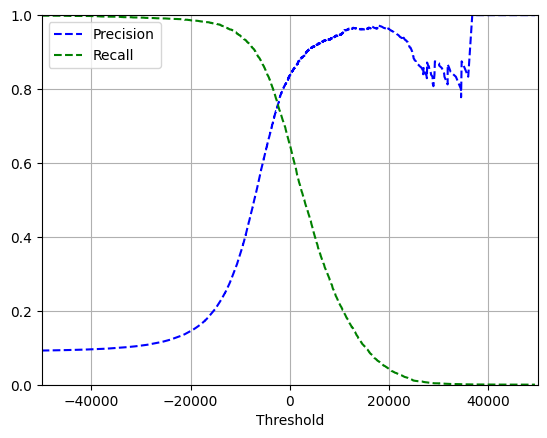

In [31]:
# plotting precision and recall as a function of threshold values using mlt

import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_pre_recal_vs_thres( precisions, recall, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label = 'Precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'Recall')
    plt.legend(loc = 'best')
    plt.xlabel('Threshold')
    plt.grid(True)
    plt.axis([-50000,50000,0,1])

plot_pre_recal_vs_thres(precisions, recalls, thresholds)
plt.show()

In [32]:
# say we aim for 90% precision

recal_90pre = recalls[np.argmax(precisions >=0.9)]
recal_90pre

0.4799852425751706

In [33]:
precisions[np.argmax(precisions >=0.9)]

0.9000345901072293

In [34]:
thres_90pre = thresholds[np.argmax(precisions >=0.9)]
thres_90pre

3370.019499143958

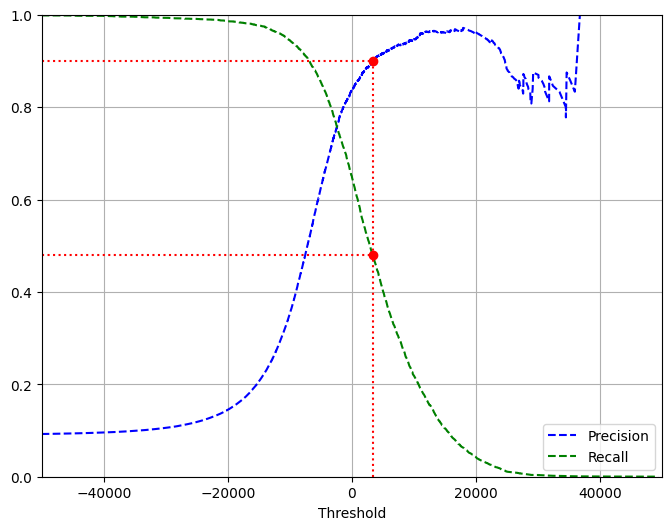

In [35]:
# marking this on the plot

plt.figure(figsize = (8,6))
plot_pre_recal_vs_thres(precisions, recalls, thresholds)
plt.plot([thres_90pre, thres_90pre],[0.,0.9],'r:')              #vertical line
plt.plot([-50000, thres_90pre],[0.9,0.9],'r:')                   # horziontal line 1
plt.plot([-50000, thres_90pre],[recal_90pre, recal_90pre],'r:')  # horizontal line 2
plt.plot([thres_90pre],[0.9],'ro')                   # point 1
plt.plot([thres_90pre],[recal_90pre],'ro')           # point 2

plt.show()

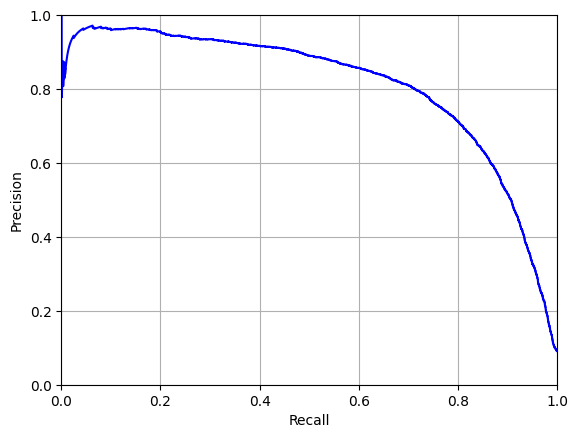

In [36]:
# precision vs recall

def pre_vs_recal(precisions, recalls):
    plt.plot(recalls, precisions,'b-')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.axis([0,1,0,1])
    plt.grid(True)

pre_vs_recal(precisions, recalls)
plt.show()

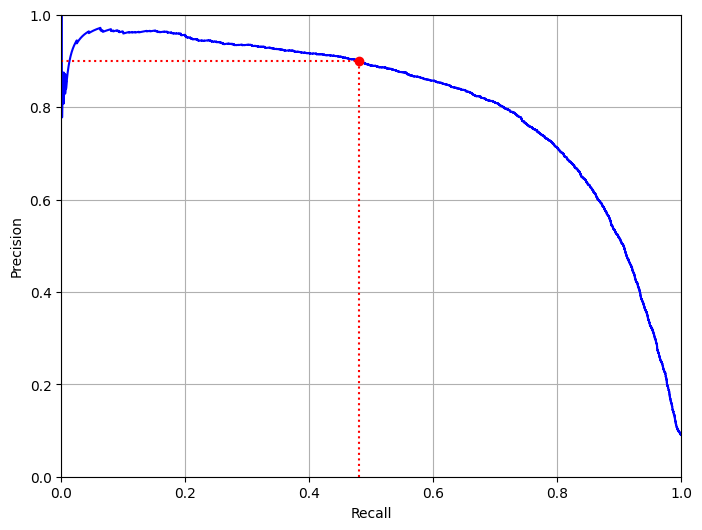

In [37]:
# marking 90% precision on plot

plt.figure(figsize = (8,6))
pre_vs_recal(precisions, recalls)
plt.plot([recal_90pre, recal_90pre], [0.,0.9], 'r:')
plt.plot([0.,recal_90pre], [0.9,0.9], 'r:')
plt.plot([recal_90pre], [0.9], 'ro')
plt.show()

In [38]:
# the ROC curve: plot b/w tpr(true positive rate or recall) and fpr(false psitive rate)
# fpr = 1- tnr(true negatve rate)
# tnr also called as specificity
# ROC : plot blw sensitivity(recall) and 1-specificity

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

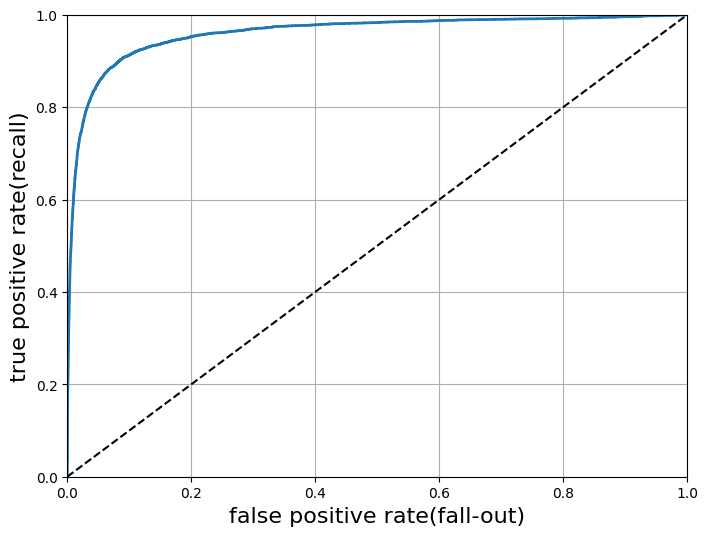

In [39]:
# plotting fpr vs tpr

def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0,1],[0,1], 'k--')    # dash diagonal
    plt.axis([0,1,0,1])
    plt.xlabel('false positive rate(fall-out)', fontsize = 16)
    plt.ylabel('true positive rate(recall)',fontsize = 16)
    plt.grid(True)
plt.figure(figsize = (8,6))
plot_roc_curve(fpr,tpr)
plt.show()

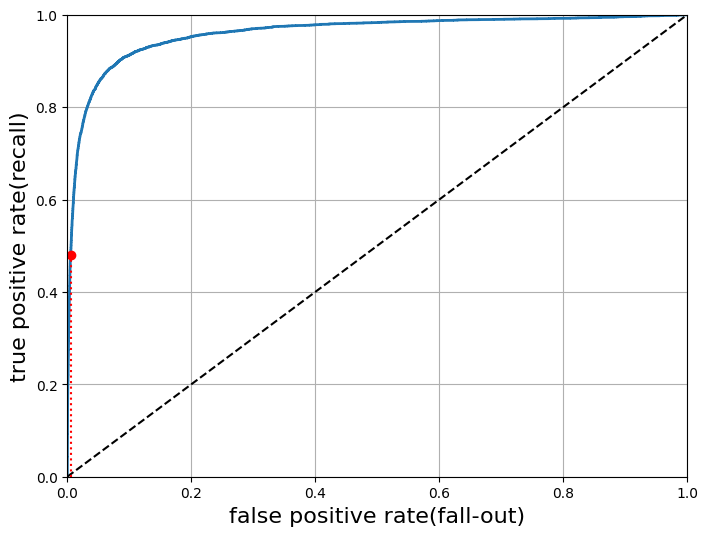

In [40]:
# plotting 90% precision

plt.figure(figsize = (8,6))
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recal_90pre)]
plt.plot([fpr_90, fpr_90],[0, recal_90pre],'r:')
plt.plot([0, fpr_90], [recal_90pre, recal_90pre], 'r:')
plt.plot([fpr_90], [recal_90pre], 'ro')
plt.show()

In [41]:
# the dotted line represents the roc curve of a purely random classifier
# a good classifier stays as far away from the line as possible

# another way to compare classifiers is to measure the area under the curve(auc)
# perfect classifier's  roc auc = 1
# random classifier's roc auc = 0.5

In [42]:
# evaluating auc using roc_auc_score

from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [43]:
# which to choose: roc curve or p/r curve
# we should prefer p/r, when positive is rare or we care of false +ve more than false -ve
# otherwise roc

In [44]:
# comparing roc curve and roc auc score of randomforestclassifier and sgdclassifier
# in randomforestclassifier there is not decision_function() rather it have a method called predict_proba(), which returns a array

from sklearn.ensemble import RandomForestClassifier

fore_clf = RandomForestClassifier(n_estimators = 100, random_state = 42)
y_probas_fore = cross_val_predict(fore_clf, X_train, y_train_5, cv = 3, method = 'predict_proba')

y_probas_fore

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

In [45]:
# this array contains a row per instance and a column per class, each containing probability that the given instance belongs to given class

type (y_probas_fore)

numpy.ndarray

In [46]:
import pandas as pd
a = pd.DataFrame(y_probas_fore)
a.head()

,0,1
0,0.11,0.89
1,0.99,0.01
2,0.96,0.04
3,1.00,0.00
4,0.99,0.01


In [47]:
# roc curve needs scores, not probas, therefore use +ve class's proab as the score
y_scores_fore = y_probas_fore[:,1]
fpr_fore, tpr_fore, threshold_fore = roc_curve(y_train_5, y_scores_fore)

In [48]:
b = pd.DataFrame(y_scores_fore)
b.head()

,0
0,0.89
1,0.01
2,0.04
3,0.00
4,0.01


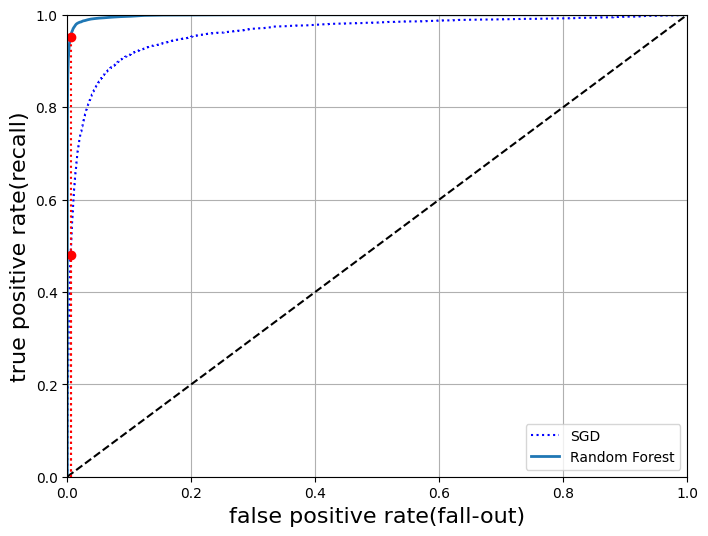

In [49]:
# roc_curve of sgd and random forest classifier on same plot

recal_fore = tpr_fore[np.argmax(fpr_fore >= fpr_90)]

plt.figure(figsize = (8,6))
plt.plot(fpr, tpr,'b:', label='SGD')
plot_roc_curve(fpr_fore, tpr_fore, label = 'Random Forest')
plt.plot([fpr_90, fpr_90], [0., recal_90pre], "r:")
plt.plot([0.0, fpr_90], [recal_90pre, recal_90pre], "r:")
plt.plot([fpr_90], [recal_90pre], "ro")
plt.plot([fpr_90, fpr_90], [0., recal_fore], "r:")
plt.plot([fpr_90], [recal_fore], "ro")
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [50]:
# roc auc score of random forest classifier
roc_auc_score(y_train_5, y_scores_fore)

0.9983436731328145

In [51]:
# precision score of the same
y_train_pred_fore = cross_val_predict(fore_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_fore)

0.9905083315756169

In [52]:
# recall score for the same
recall_score(y_train_5, y_train_pred_fore)

0.8662608374838591

In [53]:
# conclusion Random forest is better than sgd classifier
# uptill now we detect 5s
# let's detect more than 5s

In [54]:
# multiclassifier: distinguish b/w more than two classes
# performing multiclass classification using binary classifier
# a) one-v/s-all(ova): train 10 binary classsifier, one for each digit. when want to classify a image, we get the decision score for each classifier and select the one with highest score
# b) one-vs-one(ovo): train a binary classifier of every pair of digits. for n classes, we have to train n(n-1)/2 binary classifers

# for mnist n = 10 therefore we have to train 45 binary classifier
# for svm, ovo is perferred
# but for most others ova is perferred
# in scikit learn by default ova (except for svm)

In [55]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([a2])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([3], dtype=uint8)

In [56]:
# under the hood, it trains 10 binary classifier, evaluate their decision scores and returns the class with highest score
a2_score = sgd_clf.decision_function([a2])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


In [57]:
a2_score

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [58]:
np.argmax(a2_score)

3

In [59]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [60]:
# it made wrong prediction don't know why, will figure out
# let's train svm classifier

In [61]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto", random_state=42)
svm_clf.fit(X_train[:1000], y_train[:1000]) # y_train, not y_train_5
svm_clf.predict([a2])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [62]:
# so svm predicts correect
a2_scores = svm_clf.decision_function([a2])
a2_scores

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[ 2.81585438,  7.09167958,  3.82972099,  0.79365551,  5.8885703 ,
         9.29718395,  1.79862509,  8.10392157, -0.228207  ,  4.83753243]])

In [65]:
# highest score corresponds to class 5
np.argmax(a2_scores)

5

In [67]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [68]:
sgd_clf.classes_[5]

5

In [69]:
# let's use ovo on sgd
# to force scikit learn to use one-vs-one or one-vs-all, OneVsOneClassifier or OneVsRest classsifier is used

from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([a2])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneVsOneClassifier was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [70]:
# now it made correct prediction
ovo_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [73]:
# no of classifier trained = 10(10-1)/2 = 45
len(ovo_clf.estimators_)

45

In [74]:
# training a RandomForestClassifier
fore_clf.fit(X_train,y_train)
fore_clf.predict([a2])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [75]:
# to get list of probabilites assigned to each instance for each class
fore_clf.predict_proba([a2])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0.  , 0.  , 0.01, 0.08, 0.  , 0.9 , 0.  , 0.  , 0.  , 0.01]])

In [76]:
# 90% probability that the image is 5
# 8% probability that the image is 3

In [77]:
# evaluating sgd classifier accuracy using cross-validation

cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring = 'accuracy')

array([0.87365, 0.85835, 0.8689 ])

In [78]:
# scaling
from sklearn.preprocessing import StandardScaler
sac = StandardScaler()

X_train_sac = sac.fit_transform(X_train.astype(np.float64))        # converting dataframe to a numpay array
cross_val_score(sgd_clf, X_train_sac, y_train, cv = 3, scoring = 'accuracy')

array([0.8983, 0.891 , 0.9018])

In [80]:
# Standardized scaling increase accuracy abovee 89 %

In [81]:
# Error analysis
# one way to to found a promising model is to analyse the type of error it make.
# make prediction using cross _val_predict and then call confusion_matrix

y_train_pred = cross_val_predict(sgd_clf, X_train_sac, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

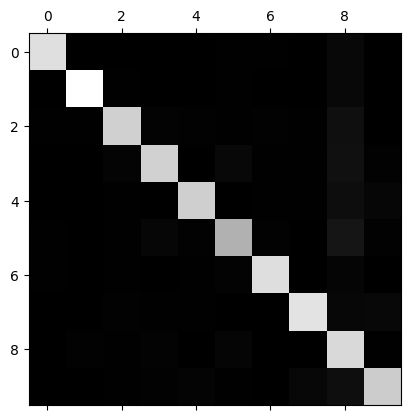

In [83]:
# let's look the image representation of confusion matrix

plt.matshow(conf_mx, cmap= plt.cm.gray)
plt.show()

In [84]:
# the 5 looks slightly darker than others , means there are fewer images of 5s
# or that the classifier doesn't perform as well on 5s as on other digits

# let's plot the errors
row_sums = conf_mx.sum(axis=1, keepdims=True)  # sum of element along each row of the confusion matrix
norm_conf_mx = conf_mx / row_sums              # normalizes the matrix

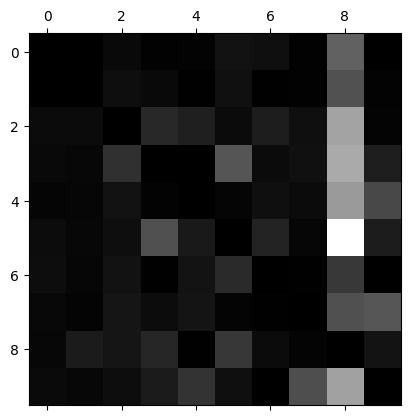

In [86]:
np.fill_diagonal(norm_conf_mx,0)      # filling the diagonal matrix with zero to keep the errors only
plt.matshow(norm_conf_mx, cmap= plt.cm.gray)
plt.show()

In [87]:
# rows: actual classes
# columns: predicted classes
# column of 8 is bright => many images gets misclassifies as 8s
# row is fine => actual 8s are predicted properly
# 3s and 5s are also confused (in both directions)

In [88]:
# Multilabel Classification: multiple classes for each instance
# outputs multiple binary tags
# KNeighborsClassifier supports multilabel classifier

from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [89]:
knn_clf.predict([a2])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[False,  True]])

In [90]:
# 5 is not large(False) and oddd(True)

In [91]:
# multioutput classsification

# a system which removes noise from images

noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise

noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise

y_train_mod = X_train
y_test_mod = X_test

NameError: name 'plot_digits' is not defined

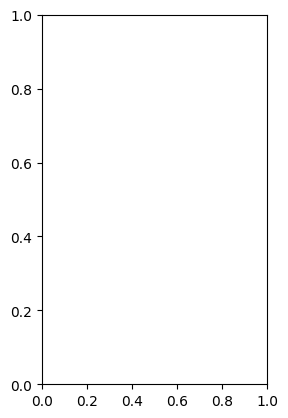

In [95]:
some_index = 0
plt.subplot(121); plot_digits(X_test_mod[some_index])
plt.subplot(122); plot_digits(y_test_mod[some_index])
plt.show()